# KDTree
A KD-tree (K-dimensional tree) is a data structure used for organizing multidimensional points in a way that facilitates efficient spatial searching, nearest neighbor queries, and range queries. Here are the basic steps to construct and use a KD-tree:

1. **Choose the dimension**: Decide on the dimension (K) of the KD-tree. This is the number of attributes or features in each data point.

2. **Build the KD-tree**:
   - **Select a split axis**: Choose one of the dimensions as the current splitting axis. Typically, you alternate dimensions at each level of the tree, cycling through dimensions 0 to (K-1).
   - **Select a pivot**: Choose a pivot point for the current node. The choice of pivot can significantly impact the tree's performance. Common pivot selection methods include median-of-median or median-of-means.
   - **Partition the data**: Split the data into two subsets based on the pivot and the current split axis. Points that have values less than the pivot on the current axis go to the left subtree, and those with values greater than or equal to the pivot go to the right subtree.
   - **Recursively build subtrees**: Recursively build KD-trees for the left and right subsets of data, using the next dimension as the splitting axis.

3. **Searching in a KD-tree**:

   - **Nearest Neighbor Search**:
     - Start at the root node.
     - Traverse the tree, moving left or right at each level based on the current splitting axis, until you reach a leaf node.
     - At each node you visit, check the distance between the query point and the current node's point.
     - Keep track of the closest point found so far.
     - After reaching a leaf node, backtrack up the tree, checking other subtrees if there could be points closer than the current closest point.
     - Continue the search until you've checked all relevant subtrees.

   - **Range Query**:
     - Start at the root node.
     - Traverse the tree, moving left or right at each level based on the current splitting axis, until you reach a leaf node.
     - At each node, check if the range (e.g., a hyperrectangle) defined by the query intersects with the partition created by the current node. If it does, recursively search the subtrees of that node.
     - Continue this process, visiting all relevant subtrees.

4. **Balancing and Optimization**:
   - To ensure the KD-tree remains balanced, you can use techniques like rebalancing or choosing good pivot selection strategies.
   - There are variations and optimizations of KD-trees, such as KD-BTrees, that aim to improve performance for specific scenarios.

Remember that constructing and using KD-trees efficiently can require careful consideration of the data, the pivot selection method, and the balancing strategy. While KD-trees are effective for certain types of spatial searching and nearest neighbor queries, they may not always be the best choice, and other data structures like Ball Trees or R-Trees might be more suitable depending on your specific application and data characteristics.

In [1]:
from sklearn.neighbors import KDTree
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data

In [12]:
X = mnist.data.astype("float32")
y = mnist.target.astype("int")

In [ ]:

# Split data into training and test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Text(0.5, 1.0, '9')

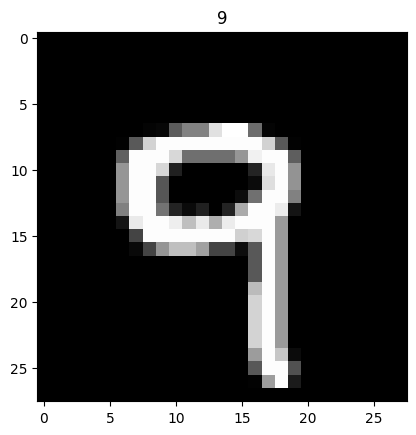

In [17]:
x=X_train.iloc[54139, :].to_numpy()
plt.imshow(x.reshape(28,28), cmap='gray')
plt.title(y_train.iloc[54139])

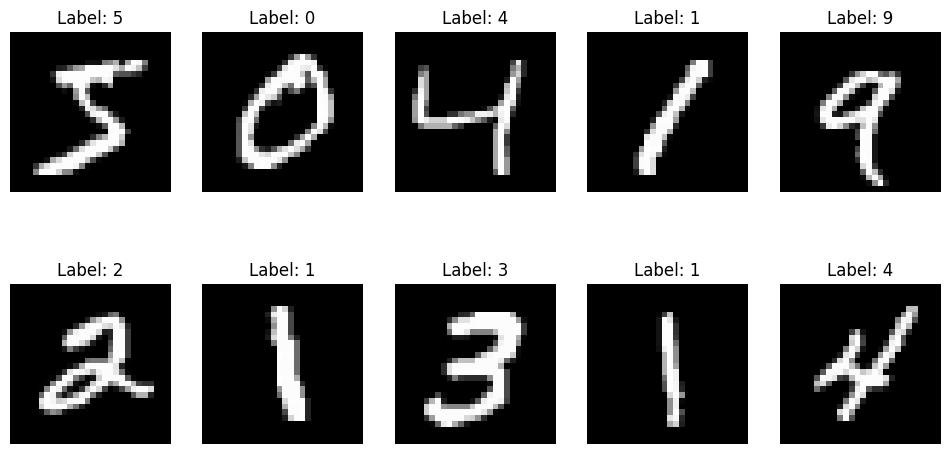

In [18]:
# Show 10 samples
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    x=X_train.iloc[i, :].to_numpy()
    plt.imshow(x.reshape(28,28), cmap="gray")
    # plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [19]:
import time
# Build the KD-Tree
kdtree = KDTree(X_train)



7026


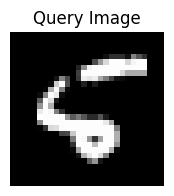

In [48]:
# Choose a query image (you can change the index)
id=np.random.randint(0,9999)
print(id)
query_image = X_test.iloc[id,:].to_numpy()
# Display the query image
plt.figure(figsize=(2, 2))
plt.imshow(query_image.reshape(28, 28), cmap="gray")
plt.title("Query Image")
plt.axis("off")
plt.show()

In [36]:
k_neighbors = 10  # Number of similar images to retrieve

# Perform K-nearest neighbors search for the query image
distances, indices = kdtree.query([query_image], k=k_neighbors)
print(distances, indices)
# Get the indices of the K-nearest neighbors
neighbor_indices = indices[0]

[[ 931.23197969  993.21347152 1063.69168465 1122.18358569 1170.58660508
  1181.92639365 1207.10314389 1241.0020145  1245.68214244 1257.2919311 ]] [[14148 23891 24495 23875 13411 31581 45721 48780 37787 49243]]


In [ ]:
# Display the top 10 similar images
plt.figure(figsize=(12, 6))
for i, neighbor_idx in enumerate(neighbor_indices):
    plt.subplot(2, 5, i + 1)
    x=X_train.iloc[neighbor_idx, :].to_numpy()
    plt.imshow(x.reshape(28, 28), cmap="gray")
    plt.title(f"Similar Image {i + 1} -- Label: {y_train[neighbor_idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Performance Evaluation

In [52]:
from sklearn.metrics import precision_score
from tqdm import tqdm
# Define a function to perform a KD-tree image search and calculate precision
def search_and_calculate_precision(query_images, query_labels,y_train, k=10):
    predicted_labels = []
    true_labels = []
    query_labels=query_labels.to_list()
    for i, query_image in tqdm(enumerate(query_images)):
        # Perform a KD-tree query to find the k-nearest neighbors
        distances, indices = kdtree.query([query_image], k=k)
        # print(i)
        # Get the labels of the k-nearest neighbors
        neighbor_labels = [y_train[idx] for idx in indices[0]]
        # print('neighbor_labels ',neighbor_labels)
        # Predict the label based on the majority class among neighbors
        # print('bincount ',np.bincount(neighbor_labels))
        predicted_label = np.argmax(np.bincount(neighbor_labels))
        # print('predicted_label ',predicted_label)
        predicted_labels.append(predicted_label)
        true_labels.append(query_labels[i])
        # if i==20:
        #   break
    # Calculate precision
    precision = precision_score(true_labels, predicted_labels, average='micro')

    return precision

In [55]:
precision = search_and_calculate_precision(X_test.to_numpy()[:100], y_test,y_train, k=10)

100it [00:13,  7.50it/s]


In [56]:
precision

0.96

## PCA & K-D Tree

In [ ]:
from sklearn.neighbors import KDTree
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist.data.astype("float32")
y = mnist.target.astype("int")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Split data into training and test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### StandardScaler
StandardScaler in sklearn is a class that is used to standardize features by removing the mean and scaling to unit variance. StandardScaler works by first calculating the mean and standard deviation of each feature in the training set. These values are then stored and used to transform the test set. The transformation process simply subtracts the mean from each feature and then divides it by the standard deviation. This results in a new set of features that have a mean of zero and a standard deviation of one.

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA for dimensionality reduction
n_components = 50  # Adjust the number of components as needed 784 to 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Build the KD-Tree with reduced-dimensional data
kdtree = KDTree(X_train_pca)

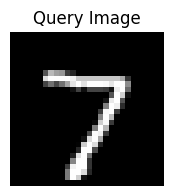

In [ ]:
# Choose a query image (you can change the index)
query_image = X_test_pca[0]
test_image=X_test.iloc[0,:].to_numpy()
k_neighbors = 10  # Number of similar images to retrieve

plt.figure(figsize=(2, 2))
plt.imshow(test_image.reshape(28, 28), cmap="gray")
plt.title("Query Image")
plt.axis("off")
plt.show()

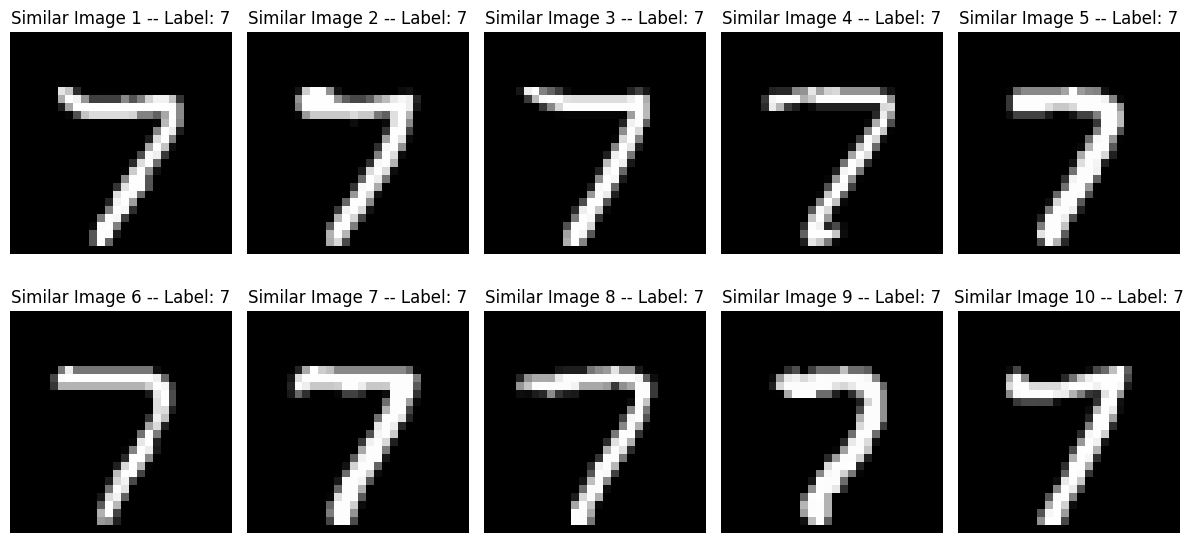

In [ ]:
# Perform K-nearest neighbors search for the query image
distances, indices = kdtree.query([query_image], k=k_neighbors)

# Map indices back to the original high-dimensional space
neighbor_indices = indices[0]

# Display the query image
# plt.figure(figsize=(2, 2))
# plt.imshow(query_image, cmap="gray")
# plt.title("Query Image (PCA)")
# plt.axis("off")
# plt.show()

# Display the top 10 similar images
plt.figure(figsize=(12, 6))
for i, neighbor_idx in enumerate(neighbor_indices):
    plt.subplot(2, 5, i + 1)
    x=X_train.iloc[neighbor_idx, :].to_numpy()
    plt.imshow(x.reshape(28, 28), cmap="gray")
    plt.title(f"Similar Image {i + 1} -- Label: {y_train[neighbor_idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
X_test_pca.shape, y_test.shape

((10000, 50), (10000,))

In [ ]:
precision = search_and_calculate_precision(X_test_pca, y_test,y_train, k=10)

In [ ]:
precision

0.9556

## KDTree With different disnce meansures

In [ ]:
import numpy as np

# def custom_distance(x, y):
#     # Define your custom distance calculation here
#     return np.sum(np.abs(x - y))  # Manhattan distance as an example
# # Create a wrapper function that conforms to the expected signature
# def custom_distance_wrapper(x, y):
#     return custom_distance(x, y)

# Using a built-in distance metric (e.g., Euclidean)
kdtree_euclidean = KDTree(X_train_pca, metric='euclidean')

# Using a different built-in distance metric (e.g., Manhattan)
kdtree_manhattan = KDTree(X_train_pca, metric='manhattan')

# Using a custom distance metric
# kdtree_custom = KDTree(X_train_pca, metric=custom_distance)
distances, indices = kdtree_euclidean.query([query_image], k=k_neighbors)

distances, indices = kdtree_manhattan.query([query_image], k=k_neighbors)

ValueError: ignored

In [ ]:
import random

class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

def build_kdtree(points, depth=0):
    if not points:
        return None

    k = len(points[0])  # Number of dimensions
    axis = depth % k

    points.sort(key=lambda point: point[axis])
    median_idx = len(points) // 2
    median = points[median_idx]

    left_subtree = build_kdtree(points[:median_idx], depth + 1)
    right_subtree = build_kdtree(points[median_idx + 1:], depth + 1)

    return Node(median, left_subtree, right_subtree)

def print_kdtree(node, level=0):
    if node is not None:
        print("  " * level + str(node.point))
        print_kdtree(node.left, level + 1)
        print_kdtree(node.right, level + 1)

# Generate random 2D points
random.seed(42)
points = [(random.randint(0, 20), random.randint(0, 20)) for _ in range(10)]

# Build and print the k-d tree
kdtree = build_kdtree(points)
print_kdtree(kdtree)


(7, 16)
  (2, 6)
    (4, 3)
      (1, 0)
    (7, 7)
      (0, 8)
  (20, 3)
    (19, 0)
      (17, 2)
    (18, 13)
